# Importing related Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Store the dataset into the Dataframe

In [2]:
train_data = pd.read_csv("train.csv")

# Check the Detail information of the dataframe

In [3]:
train_data.shape

(550068, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# CHECKING THE NULL AND UNIQUE VALUES

In [8]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
for col in train_data.columns:
    if train_data[col].isnull().sum()>0:
        print(col,"-",((train_data[col].isnull().sum())*100)/len(train_data),"%")

Product_Category_2 - 31.566642669633573 %
Product_Category_3 - 69.67265865311198 %


In [10]:
print('The number of unique Users are:',train_data['User_ID'].nunique())
print('The number of unique Products are:',train_data['Product_ID'].nunique())

The number of unique Users are: 5891
The number of unique Products are: 3631


# EDA

<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

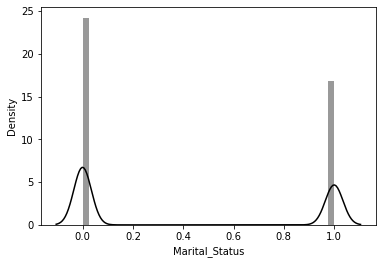

In [11]:
sns.distplot(train_data['Marital_Status'],color ='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x259f259e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x259f259efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259f259e580>],
 'medians': [<matplotlib.lines.Line2D at 0x259f25aa6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259f25aaa00>],
 'means': []}

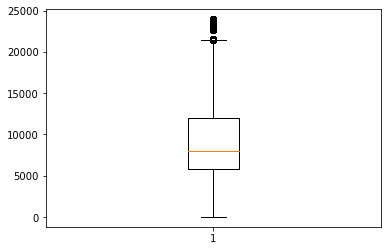

In [12]:
plt.boxplot(train_data["Purchase"])

M    414259
F    135809
Name: Gender, dtype: int64


<AxesSubplot:title={'center':'Gender'}>

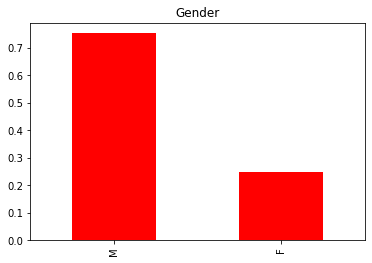

In [13]:
print(train_data["Gender"].value_counts())
train_data['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender',color='red')

(array([ 15102.,  21504.,      0., 219587.,      0.,  45701.,  38501.,
             0., 110013.,  99660.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

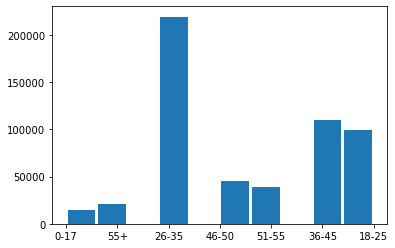

In [14]:
plt.hist(train_data['Age'],histtype='bar',rwidth=0.9)

(array([101838.,      0.,  84726.,      0.,      0.,  95285.,      0.,
        193821.,      0.,  74398.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

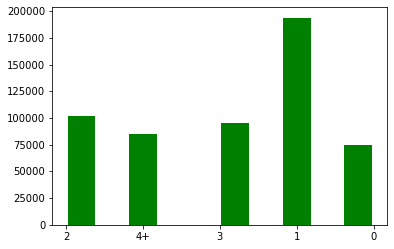

In [15]:
plt.hist(train_data['Stay_In_Current_City_Years'],histtype='bar',rwidth=0.9,color='g')

(array([117064.,  44238.,  84485.,  79488.,   7837.,  24516.,  38907.,
         39474.,  65414.,  48645.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

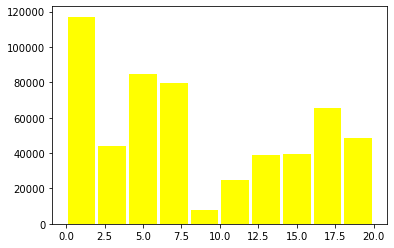

In [16]:
plt.hist(train_data['Occupation'],histtype='bar',rwidth=0.9,color='YELLOW')

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


<AxesSubplot:title={'center':'City_Category'}>

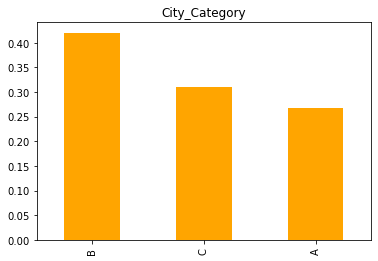

In [17]:
print(train_data["City_Category"].value_counts())
train_data['City_Category'].value_counts(normalize = True).plot.bar(title = 'City_Category',color='ORANGE')

Product_Category_1
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64


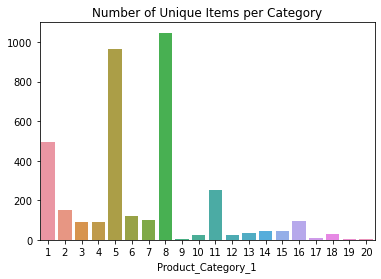

In [18]:
prod1 = train_data.groupby('Product_Category_1')['Product_ID'].nunique()
print(prod1)
sns.barplot(x = prod1.index,y = prod1.values)
plt.title('Number of Unique Items per Category')
plt.show()

Product_Category_2
2.0     127
3.0      12
4.0     146
5.0     128
6.0      60
7.0       4
8.0     355
9.0      20
10.0     14
11.0     70
12.0     45
13.0     51
14.0    318
15.0    138
16.0    221
17.0     76
18.0     18
Name: Product_ID, dtype: int64


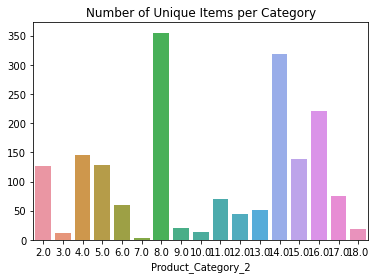

In [19]:
prod2 = train_data.groupby('Product_Category_2')['Product_ID'].nunique()
print(prod2)
sns.barplot(x = prod2.index,y = prod2.values)
plt.title('Number of Unique Items per Category')
plt.show()

Product_Category_3
3.0       3
4.0      14
5.0      43
6.0      14
8.0      37
9.0      37
10.0      5
11.0      6
12.0     31
13.0     16
14.0     80
15.0     69
16.0    117
17.0     42
18.0     14
Name: Product_ID, dtype: int64


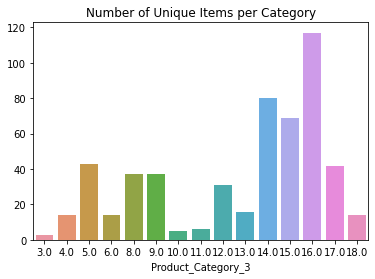

In [20]:
prod3 = train_data.groupby('Product_Category_3')['Product_ID'].nunique()
print(prod3)
sns.barplot(x = prod3.index,y = prod3.values)
plt.title('Number of Unique Items per Category')
plt.show()

<AxesSubplot:title={'center':'City Categry'}, ylabel='Purchase'>

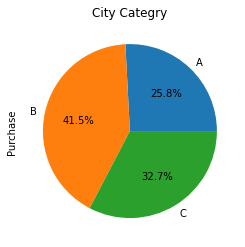

In [21]:
train_data.groupby("City_Category")["Purchase"].sum().plot.pie(title = "City Categry",autopct = "%1.1f%%")

<AxesSubplot:title={'center':'Gender'}, ylabel='Purchase'>

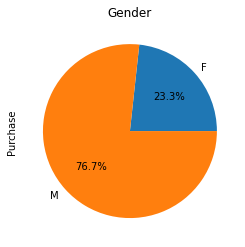

In [22]:
train_data.groupby("Gender")["Purchase"].sum().plot.pie(title = "Gender",autopct = "%1.1f%%")

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Stay_In_Current_City_Years'>

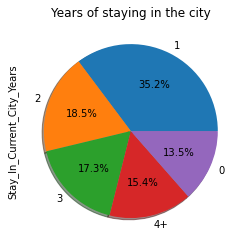

In [23]:
train_data["Stay_In_Current_City_Years"].value_counts().plot.pie(title = "Years of staying in the city", autopct = "%1.1f%%", shadow = True)

# FEATURE ENGINEERING

In [24]:
data = train_data.copy()
data = data.drop(columns = ['Marital_Status'])

# ONE HOT ENCODING

In [25]:
#For Train Data

# First do One Hot encoding for Product Category 1
df_oneHot = pd.get_dummies(data, columns = ['Product_Category_1'], prefix = ['P'])
#Fill NaN values with Zeros
df_oneHot = df_oneHot.fillna(0)
for i in range(1, 15):
    df_oneHot.loc[df_oneHot.Product_Category_2 == i,'P_'+ str(i)]= 1
    df_oneHot.loc[df_oneHot.Product_Category_3 == i,'P_'+ str(i)]= 1

In [26]:
df_oneHot

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_2,Product_Category_3,Purchase,...,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20
0,1000001,P00069042,F,0-17,10,A,2,0.0,0.0,8370,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,6.0,14.0,15200,...,0,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0.0,0.0,1422,...,0,1,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,14.0,0.0,1057,...,0,1,0,1,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0.0,0.0,7969,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,0.0,0.0,368,...,0,0,0,0,0,0,0,0,0,1
550064,1006035,P00375436,F,26-35,1,C,3,0.0,0.0,371,...,0,0,0,0,0,0,0,0,0,1
550065,1006036,P00375436,F,26-35,15,B,4+,0.0,0.0,137,...,0,0,0,0,0,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,2,0.0,0.0,365,...,0,0,0,0,0,0,0,0,0,1


# DROP THE MOST NULL VALUED COLUMNS

In [27]:
df_oneHot = df_oneHot.drop(columns = ['Product_Category_2', 'Product_Category_3'])

In [28]:
df_oneHot['Product_ID'] = df_oneHot['Product_ID'].str.replace('P00', '')
df_oneHot

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Purchase,P_1,P_2,...,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20
0,1000001,069042,F,0-17,10,A,2,8370,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,248942,F,0-17,10,A,2,15200,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1000001,087842,F,0-17,10,A,2,1422,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1000001,085442,F,0-17,10,A,2,1057,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1000002,285442,M,55+,16,C,4+,7969,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,M,51-55,13,B,1,368,0,0,...,0,0,0,0,0,0,0,0,0,1
550064,1006035,375436,F,26-35,1,C,3,371,0,0,...,0,0,0,0,0,0,0,0,0,1
550065,1006036,375436,F,26-35,15,B,4+,137,0,0,...,0,0,0,0,0,0,0,0,0,1
550066,1006038,375436,F,55+,1,C,2,365,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
target = data.Purchase
df_oneHot = df_oneHot.drop(columns = ['Purchase'])

In [30]:
df_oneHot = df_oneHot.replace({'Gender': {'M': 1, 'F':0}})

In [31]:
data_df_onehot = pd.get_dummies(df_oneHot, columns=['Age',"Occupation", 
                                               'City_Category','Stay_In_Current_City_Years'], 
                                 prefix = ['Age',"Occupation", 
                                               'City','Stay'])

In [32]:
data_df_onehot

,User_ID,Product_ID,Gender,P_1,P_2,P_3,P_4,P_5,P_6,P_7,...,Occupation_19,Occupation_20,City_A,City_B,City_C,Stay_0,Stay_1,Stay_2,Stay_3,Stay_4+
0,1000001,069042,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,248942,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,087842,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,085442,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,285442,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
550064,1006035,375436,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
550065,1006036,375436,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
550066,1006038,375436,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# FEATURE SCALING

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#For Train Data
data_df_onehot['Product_ID'] = scaler.fit_transform(data_df_onehot['Product_ID'].values.reshape(-1, 1))
data_df_onehot['User_ID'] = scaler.transform(data_df_onehot['User_ID'].values.reshape(-1, 1))

In [34]:
data_df_onehot

,User_ID,Product_ID,Gender,P_1,P_2,P_3,P_4,P_5,P_6,P_7,...,Occupation_19,Occupation_20,City_A,City_B,City_C,Stay_0,Stay_1,Stay_2,Stay_3,Stay_4+
0,8.031970,-1.028774,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.031970,0.722139,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,8.031970,-0.845799,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,8.031970,-0.869157,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,8.031980,1.077382,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,8.090678,1.924156,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
550064,8.090697,1.953267,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
550065,8.090707,1.953267,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
550066,8.090726,1.953267,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# TRAIN AND TEST DATA SPLIT

In [35]:
train1_data, test1_data, t_train1_labels, t_test1_labels = train_test_split(data_df_onehot, target, test_size=0.2, random_state=42)

# CHOOSING THE MODEL

In [36]:
MSE_Score = []
R2_Score = []
Algorithm = []


In [37]:
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(train1_data, t_train1_labels)
predicted= regressor.predict(test1_data)

In [38]:
MSE_Score.append(mean_squared_error(t_test1_labels, predicted))
R2_Score.append(r2_score(t_test1_labels, predicted))

# EVALUATION OF MODEL

In [39]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[11964545.185576381],[0.5238215593534991],

In [40]:
from sklearn.metrics import accuracy_score


random_model_accuracy2 = round(regressor.score(train1_data, t_train1_labels)*100,2)
print(round(random_model_accuracy2, 2), '%')

53.1 %


In [41]:
random_model_accuracy2 = round(regressor.score(test1_data,t_test1_labels)*100,2)
print(round(random_model_accuracy2, 2), '%')

52.38 %


In [42]:
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(train1_data, t_train1_labels)
predicted = regressor.predict(test1_data)

In [43]:
MSE_Score.append(mean_squared_error(t_test1_labels, predicted))
R2_Score.append(r2_score(t_test1_labels, predicted))

In [44]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'XGB Regressor'],[11964545.185576381, 7161954.315917875],[0.5238215593534991, 0.7149604782096897],

In [45]:
from sklearn.metrics import accuracy_score


random_model_accuracy2 = round(regressor.score(train1_data, t_train1_labels)*100,2)
print(round(random_model_accuracy2, 2), '%')

72.87 %


In [46]:
random_model_accuracy2 = round(regressor.score(test1_data,t_test1_labels)*100,2)
print(round(random_model_accuracy2, 2), '%')

71.5 %


WE FOUND THAT THE XGBOOST HAS THE GOOD ACCURACY,SO CHOOSING THIS MODEL FOR FUTURE WILL GIVE BETTER RESULT

In [47]:
#For Train Data
dtrain = xgb.DMatrix(train1_data, label=t_train1_labels)
dtest = xgb.DMatrix(test1_data, label=t_test1_labels)

In [48]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}


params['eval_metric'] = "rmse"
num_boost_round = 999

In [49]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
    
)

[0]	Test-rmse:7753.66064
[1]	Test-rmse:5930.35059
[2]	Test-rmse:4768.99365
[3]	Test-rmse:4027.15039
[4]	Test-rmse:3586.86426
[5]	Test-rmse:3348.09937
[6]	Test-rmse:3185.80542
[7]	Test-rmse:3085.66626
[8]	Test-rmse:3035.16016
[9]	Test-rmse:3002.64526
[10]	Test-rmse:2969.64111
[11]	Test-rmse:2954.43018
[12]	Test-rmse:2940.31445
[13]	Test-rmse:2928.56714
[14]	Test-rmse:2923.85230
[15]	Test-rmse:2912.66040
[16]	Test-rmse:2908.83813
[17]	Test-rmse:2900.42017
[18]	Test-rmse:2896.76562
[19]	Test-rmse:2874.67895
[20]	Test-rmse:2870.76660
[21]	Test-rmse:2866.29492
[22]	Test-rmse:2861.18091
[23]	Test-rmse:2860.06396
[24]	Test-rmse:2851.43555
[25]	Test-rmse:2850.10913
[26]	Test-rmse:2842.15869
[27]	Test-rmse:2836.49561
[28]	Test-rmse:2832.87158
[29]	Test-rmse:2831.68506
[30]	Test-rmse:2825.16821
[31]	Test-rmse:2821.51343
[32]	Test-rmse:2818.22314
[33]	Test-rmse:2813.51001
[34]	Test-rmse:2809.33130
[35]	Test-rmse:2808.22925
[36]	Test-rmse:2807.19946
[37]	Test-rmse:2805.14941
[38]	Test-rmse:2802.42

[308]	Test-rmse:2559.02734
[309]	Test-rmse:2558.67993
[310]	Test-rmse:2557.95142
[311]	Test-rmse:2557.97461
[312]	Test-rmse:2557.74219
[313]	Test-rmse:2557.65063
[314]	Test-rmse:2557.69214
[315]	Test-rmse:2557.49097
[316]	Test-rmse:2557.52661
[317]	Test-rmse:2557.03687
[318]	Test-rmse:2556.60230
[319]	Test-rmse:2556.50269
[320]	Test-rmse:2556.16772
[321]	Test-rmse:2555.60083
[322]	Test-rmse:2555.44873
[323]	Test-rmse:2555.47925
[324]	Test-rmse:2554.99756
[325]	Test-rmse:2554.66870
[326]	Test-rmse:2554.58838
[327]	Test-rmse:2554.48071
[328]	Test-rmse:2554.38574
[329]	Test-rmse:2554.17090
[330]	Test-rmse:2554.02222
[331]	Test-rmse:2553.98047
[332]	Test-rmse:2553.73413
[333]	Test-rmse:2553.73267
[334]	Test-rmse:2553.51709
[335]	Test-rmse:2553.28613
[336]	Test-rmse:2553.00049
[337]	Test-rmse:2552.59814
[338]	Test-rmse:2552.43140
[339]	Test-rmse:2552.26123
[340]	Test-rmse:2552.02490
[341]	Test-rmse:2551.92847
[342]	Test-rmse:2551.81714
[343]	Test-rmse:2550.98682
[344]	Test-rmse:2550.90503
[

[612]	Test-rmse:2519.76611
[613]	Test-rmse:2519.65869
[614]	Test-rmse:2519.67944
[615]	Test-rmse:2519.63965
[616]	Test-rmse:2519.68701
[617]	Test-rmse:2519.60181
[618]	Test-rmse:2519.56152
[619]	Test-rmse:2519.51782
[620]	Test-rmse:2519.41626
[621]	Test-rmse:2519.51392
[622]	Test-rmse:2519.31738
[623]	Test-rmse:2519.28320
[624]	Test-rmse:2519.19995
[625]	Test-rmse:2519.08496
[626]	Test-rmse:2518.85644
[627]	Test-rmse:2518.57764
[628]	Test-rmse:2518.52563
[629]	Test-rmse:2518.55981
[630]	Test-rmse:2518.61353
[631]	Test-rmse:2518.42944
[632]	Test-rmse:2518.32153
[633]	Test-rmse:2518.18286
[634]	Test-rmse:2518.10034
[635]	Test-rmse:2518.03369
[636]	Test-rmse:2517.95850
[637]	Test-rmse:2517.93774
[638]	Test-rmse:2517.86377
[639]	Test-rmse:2517.58081
[640]	Test-rmse:2517.50000
[641]	Test-rmse:2517.47290
[642]	Test-rmse:2517.44605
[643]	Test-rmse:2517.33716
[644]	Test-rmse:2517.33838
[645]	Test-rmse:2517.30933
[646]	Test-rmse:2517.27295
[647]	Test-rmse:2517.30957
[648]	Test-rmse:2517.19653
[

# HYPERPARAMETER TUNING USING GRIDSEARCH

In [50]:
#Takes a lot of time


#Select a range of values for different parameters
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8) #TRY GREATER VALUES > 60
]
#Initialize minimum rmse and the best parameters
min_rmse  = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5,
        verbose_eval = True
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)

CV with max_depth=9, min_child_weight=5
[0]	train-rmse:7699.01689+3.78539	test-rmse:7700.09678+14.88167
[1]	train-rmse:5811.09346+2.35745	test-rmse:5814.59326+14.47324
[2]	train-rmse:4601.38272+3.44358	test-rmse:4608.59854+12.55980
[3]	train-rmse:3832.48950+5.61321	test-rmse:3844.21694+12.88904
[4]	train-rmse:3387.59297+4.63960	test-rmse:3404.83237+11.94422
[5]	train-rmse:3103.13667+4.79966	test-rmse:3124.93379+12.06148
[6]	train-rmse:2948.43589+6.39235	test-rmse:2974.20093+11.78108
[7]	train-rmse:2869.68335+7.94977	test-rmse:2899.62129+8.27168
[8]	train-rmse:2817.00786+9.78553	test-rmse:2850.74604+11.02503
[9]	train-rmse:2781.56597+8.89636	test-rmse:2818.83818+10.58534
[10]	train-rmse:2756.51167+7.26120	test-rmse:2797.45034+8.30194
[11]	train-rmse:2736.65840+7.14127	test-rmse:2780.60381+10.08221
[12]	train-rmse:2722.53467+10.03592	test-rmse:2768.96157+10.93103
[13]	train-rmse:2709.63252+9.26104	test-rmse:2758.35522+8.10149
[14]	train-rmse:2697.11724+7.81662	test-rmse:2747.87974+9.9352

[127]	train-rmse:2294.56021+8.99001	test-rmse:2546.56284+8.28392
[128]	train-rmse:2292.98257+9.03820	test-rmse:2546.29395+8.26251
[129]	train-rmse:2291.51499+9.27002	test-rmse:2546.19932+8.28050
[130]	train-rmse:2290.28696+8.80064	test-rmse:2545.97725+8.55421
[131]	train-rmse:2288.28677+8.29178	test-rmse:2545.42827+8.49881
[132]	train-rmse:2286.53755+8.62923	test-rmse:2545.15322+8.33619
[133]	train-rmse:2284.34863+8.11006	test-rmse:2544.67905+8.42016
[134]	train-rmse:2282.64614+8.09604	test-rmse:2544.45518+8.47186
[135]	train-rmse:2281.11089+7.89388	test-rmse:2544.02954+8.46848
[136]	train-rmse:2279.30488+8.15704	test-rmse:2543.66143+8.23850
[137]	train-rmse:2278.14849+8.03358	test-rmse:2543.36802+8.35132
[138]	train-rmse:2276.05786+8.10672	test-rmse:2543.07441+8.39964
[139]	train-rmse:2274.27622+7.80113	test-rmse:2542.72520+8.44215
[140]	train-rmse:2272.69165+7.50438	test-rmse:2542.57085+8.72343
[141]	train-rmse:2271.26064+7.65146	test-rmse:2542.39082+8.68965
[142]	train-rmse:2269.347

[253]	train-rmse:2122.33179+7.56736	test-rmse:2530.27256+9.57830
[254]	train-rmse:2121.49731+7.65815	test-rmse:2530.30254+9.63821
[255]	train-rmse:2120.54380+7.84145	test-rmse:2530.25215+9.58100
	RMSE 2530.1768066 for 251 rounds
CV with max_depth=9, min_child_weight=6
[0]	train-rmse:7699.02656+3.77876	test-rmse:7700.04180+14.86139
[1]	train-rmse:5811.15498+2.35493	test-rmse:5814.47656+14.30684
[2]	train-rmse:4601.47559+3.47973	test-rmse:4608.37705+12.30721
[3]	train-rmse:3833.22573+5.45210	test-rmse:3844.76743+13.30832
[4]	train-rmse:3387.62656+5.04833	test-rmse:3404.51958+11.78065
[5]	train-rmse:3103.97197+5.29595	test-rmse:3125.45278+12.50666
[6]	train-rmse:2948.75815+7.62094	test-rmse:2974.12144+11.70390
[7]	train-rmse:2869.02612+10.73899	test-rmse:2898.29585+9.25098
[8]	train-rmse:2817.16079+7.90791	test-rmse:2850.22192+8.35506
[9]	train-rmse:2779.25664+4.51471	test-rmse:2815.96694+9.23876
[10]	train-rmse:2757.11221+5.36991	test-rmse:2797.14370+8.91127
[11]	train-rmse:2736.29463+8.

[123]	train-rmse:2308.04014+3.99586	test-rmse:2545.40713+10.79384
[124]	train-rmse:2306.20757+4.36985	test-rmse:2545.05903+10.80345
[125]	train-rmse:2304.40400+4.96522	test-rmse:2544.48789+10.86886
[126]	train-rmse:2302.93945+5.50583	test-rmse:2544.17095+10.63450
[127]	train-rmse:2301.25024+4.97983	test-rmse:2543.78047+10.47971
[128]	train-rmse:2299.74727+4.73100	test-rmse:2543.48857+10.43902
[129]	train-rmse:2298.09014+4.44214	test-rmse:2543.13105+10.67927
[130]	train-rmse:2296.32012+5.01008	test-rmse:2542.83833+10.76425
[131]	train-rmse:2294.22041+5.05664	test-rmse:2542.37202+10.69280
[132]	train-rmse:2293.08530+5.39813	test-rmse:2542.15010+10.69723
[133]	train-rmse:2292.12642+5.68875	test-rmse:2541.98232+10.80176
[134]	train-rmse:2290.76094+5.28768	test-rmse:2541.71768+10.73220
[135]	train-rmse:2289.28555+5.03892	test-rmse:2541.40078+10.73116
[136]	train-rmse:2287.61831+4.99346	test-rmse:2541.15557+10.73531
[137]	train-rmse:2285.99297+4.81835	test-rmse:2540.86099+10.82076
[138]	trai

[23]	train-rmse:2627.37700+7.40671	test-rmse:2694.99224+5.68743
[24]	train-rmse:2621.21421+7.19836	test-rmse:2690.60703+5.25445
[25]	train-rmse:2615.43901+7.66224	test-rmse:2687.14268+4.72592
[26]	train-rmse:2609.65620+7.29985	test-rmse:2683.38711+5.67466
[27]	train-rmse:2604.56484+9.01768	test-rmse:2680.11465+4.72516
[28]	train-rmse:2599.14800+8.56697	test-rmse:2676.33062+6.22156
[29]	train-rmse:2592.80225+8.83097	test-rmse:2671.70059+8.48749
[30]	train-rmse:2586.19023+7.29948	test-rmse:2667.29058+7.84747
[31]	train-rmse:2580.10459+8.56406	test-rmse:2663.64102+5.58954
[32]	train-rmse:2573.91538+9.22190	test-rmse:2659.45664+6.47694
[33]	train-rmse:2569.25669+10.18937	test-rmse:2656.55264+5.68744
[34]	train-rmse:2565.27817+10.57452	test-rmse:2654.21846+5.48476
[35]	train-rmse:2560.49609+11.27821	test-rmse:2651.08530+4.55905
[36]	train-rmse:2556.73838+11.28379	test-rmse:2648.95273+4.11650
[37]	train-rmse:2551.82886+9.45780	test-rmse:2645.90640+5.68952
[38]	train-rmse:2547.68042+9.38446	t

[150]	train-rmse:2272.87563+5.49633	test-rmse:2537.83359+10.33668
[151]	train-rmse:2271.43726+4.60924	test-rmse:2537.48711+10.50340
[152]	train-rmse:2269.71470+4.63357	test-rmse:2537.17939+10.48381
[153]	train-rmse:2268.38013+4.68956	test-rmse:2536.89932+10.33024
[154]	train-rmse:2266.93276+4.42175	test-rmse:2536.79360+10.43145
[155]	train-rmse:2265.07690+4.10176	test-rmse:2536.57822+10.31539
[156]	train-rmse:2263.29238+4.07880	test-rmse:2536.21675+10.26919
[157]	train-rmse:2261.51299+3.83403	test-rmse:2535.75088+10.48885
[158]	train-rmse:2259.85508+3.66131	test-rmse:2535.56597+10.34190
[159]	train-rmse:2258.33516+3.64498	test-rmse:2535.27080+10.23855
[160]	train-rmse:2257.04629+3.96591	test-rmse:2535.03906+10.30725
[161]	train-rmse:2255.53105+3.68096	test-rmse:2534.75606+10.29942
[162]	train-rmse:2253.78027+3.54960	test-rmse:2534.62944+10.14183
[163]	train-rmse:2252.48652+3.55984	test-rmse:2534.47183+10.10008
[164]	train-rmse:2251.41289+3.41152	test-rmse:2534.40664+10.14406
[165]	trai

[16]	train-rmse:2611.67930+10.15228	test-rmse:2703.21099+11.33396
[17]	train-rmse:2602.06519+9.37022	test-rmse:2696.49482+10.15276
[18]	train-rmse:2592.43950+7.86630	test-rmse:2689.84297+12.28385
[19]	train-rmse:2583.14883+6.94196	test-rmse:2684.53623+12.38258
[20]	train-rmse:2574.78223+7.86793	test-rmse:2679.39004+13.00698
[21]	train-rmse:2569.11582+8.07916	test-rmse:2675.57515+14.09670
[22]	train-rmse:2558.29951+8.47479	test-rmse:2668.34204+13.34374
[23]	train-rmse:2548.71646+6.97815	test-rmse:2662.24673+13.00868
[24]	train-rmse:2542.39946+6.62202	test-rmse:2658.30142+11.63412
[25]	train-rmse:2534.21221+6.67475	test-rmse:2653.15288+12.89003
[26]	train-rmse:2528.44219+8.56726	test-rmse:2649.97954+13.44081
[27]	train-rmse:2522.33848+8.88677	test-rmse:2646.75723+13.86384
[28]	train-rmse:2516.43042+7.45901	test-rmse:2643.57324+13.89621
[29]	train-rmse:2510.32163+9.03757	test-rmse:2640.35059+14.75734
[30]	train-rmse:2504.45693+8.91631	test-rmse:2636.98779+15.48302
[31]	train-rmse:2499.713

[142]	train-rmse:2159.32153+8.30866	test-rmse:2539.79365+12.78208
[143]	train-rmse:2157.96172+7.53772	test-rmse:2539.80869+12.67050
[144]	train-rmse:2156.07192+6.98605	test-rmse:2539.72905+12.85351
[145]	train-rmse:2153.57427+6.97313	test-rmse:2539.36724+12.74604
[146]	train-rmse:2152.14990+7.13143	test-rmse:2539.24282+12.62221
[147]	train-rmse:2150.77803+7.28625	test-rmse:2539.22695+12.70463
[148]	train-rmse:2148.90171+7.69226	test-rmse:2539.10313+12.59578
[149]	train-rmse:2147.07422+7.44487	test-rmse:2538.96230+12.68740
[150]	train-rmse:2145.60410+7.44858	test-rmse:2538.92832+12.72511
[151]	train-rmse:2143.30435+7.53361	test-rmse:2538.76348+12.57023
[152]	train-rmse:2141.24902+7.79217	test-rmse:2538.60635+12.27558
[153]	train-rmse:2138.92544+8.08991	test-rmse:2538.52065+12.43368
[154]	train-rmse:2137.34497+7.80212	test-rmse:2538.40630+12.50579
[155]	train-rmse:2135.70923+7.55956	test-rmse:2538.30752+12.59567
[156]	train-rmse:2133.54941+6.79290	test-rmse:2538.21782+12.56627
[157]	trai

[85]	train-rmse:2296.06279+8.47700	test-rmse:2554.90063+10.67558
[86]	train-rmse:2292.71152+7.79099	test-rmse:2553.97437+10.49089
[87]	train-rmse:2290.53213+7.58430	test-rmse:2553.36382+9.99538
[88]	train-rmse:2287.93374+8.61906	test-rmse:2552.60249+9.87219
[89]	train-rmse:2285.92700+8.54786	test-rmse:2552.37124+9.92998
[90]	train-rmse:2283.41787+8.53466	test-rmse:2551.93437+10.38858
[91]	train-rmse:2280.76021+8.68624	test-rmse:2551.51875+10.38821
[92]	train-rmse:2278.26436+8.73192	test-rmse:2550.83618+9.99386
[93]	train-rmse:2275.16289+9.22720	test-rmse:2550.30039+10.30369
[94]	train-rmse:2272.12876+9.28479	test-rmse:2549.88589+10.06261
[95]	train-rmse:2270.36201+8.83586	test-rmse:2549.59243+10.23953
[96]	train-rmse:2268.88369+8.87291	test-rmse:2549.35522+10.36216
[97]	train-rmse:2266.23540+8.04795	test-rmse:2548.85684+9.97593
[98]	train-rmse:2262.93281+7.70018	test-rmse:2548.01929+9.99199
[99]	train-rmse:2260.87354+7.98635	test-rmse:2547.72617+9.98559
[100]	train-rmse:2258.64702+8.52

[14]	train-rmse:2634.58071+7.09247	test-rmse:2715.83306+10.04572
[15]	train-rmse:2624.64541+8.52160	test-rmse:2708.80713+9.53369
[16]	train-rmse:2613.94810+8.28347	test-rmse:2701.62925+11.23302
[17]	train-rmse:2603.22368+9.43891	test-rmse:2694.43862+10.36919
[18]	train-rmse:2592.28032+9.09470	test-rmse:2687.30806+10.55560
[19]	train-rmse:2584.02769+9.27833	test-rmse:2682.20498+10.53509
[20]	train-rmse:2578.43071+9.07076	test-rmse:2678.41714+11.85576
[21]	train-rmse:2569.76870+6.50818	test-rmse:2671.83813+12.91505
[22]	train-rmse:2562.85781+6.62851	test-rmse:2668.34141+12.48771
[23]	train-rmse:2556.79121+5.82765	test-rmse:2664.89004+12.36942
[24]	train-rmse:2550.94209+6.10581	test-rmse:2661.70786+11.40778
[25]	train-rmse:2544.08159+7.79234	test-rmse:2657.41489+10.74159
[26]	train-rmse:2539.16714+8.68324	test-rmse:2654.78467+9.50531
[27]	train-rmse:2531.45869+9.27721	test-rmse:2649.99204+9.66895
[28]	train-rmse:2526.19614+10.78913	test-rmse:2647.25215+9.65748
[29]	train-rmse:2520.38364+1

[140]	train-rmse:2185.44102+9.58611	test-rmse:2537.39238+10.60271
[141]	train-rmse:2183.14897+9.45031	test-rmse:2537.18169+10.57160
[142]	train-rmse:2181.23486+9.82947	test-rmse:2537.04668+10.46962
[143]	train-rmse:2179.76948+10.10379	test-rmse:2536.97095+10.52748
[144]	train-rmse:2177.68003+9.71097	test-rmse:2536.73047+10.67731
[145]	train-rmse:2176.18657+9.52265	test-rmse:2536.65420+10.69867
[146]	train-rmse:2174.48477+9.55952	test-rmse:2536.65161+10.66826
[147]	train-rmse:2172.88628+9.89303	test-rmse:2536.67280+10.79641
[148]	train-rmse:2171.28101+10.01895	test-rmse:2536.57358+10.69862
[149]	train-rmse:2169.11284+10.47795	test-rmse:2536.35083+10.49336
[150]	train-rmse:2167.49614+9.63144	test-rmse:2536.26162+10.62625
[151]	train-rmse:2165.35732+8.77867	test-rmse:2536.12349+10.53490
[152]	train-rmse:2163.32080+9.16567	test-rmse:2535.95996+10.43841
[153]	train-rmse:2161.36694+9.04615	test-rmse:2535.83467+10.43843
[154]	train-rmse:2159.83022+8.60732	test-rmse:2535.77227+10.46660
[155]	t

[99]	train-rmse:2136.88472+8.44303	test-rmse:2544.94692+9.91547
[100]	train-rmse:2134.11567+7.96343	test-rmse:2544.72183+10.09204
[101]	train-rmse:2132.25791+8.43751	test-rmse:2544.59263+10.10524
[102]	train-rmse:2130.00361+8.79539	test-rmse:2544.42910+10.26699
[103]	train-rmse:2127.52510+8.38874	test-rmse:2544.35967+10.29096
[104]	train-rmse:2124.70923+8.96815	test-rmse:2544.11528+10.35374
[105]	train-rmse:2123.21133+8.75929	test-rmse:2544.09126+10.38707
[106]	train-rmse:2120.91909+8.63431	test-rmse:2544.04497+10.45031
[107]	train-rmse:2117.66406+8.31027	test-rmse:2544.00703+10.52438
[108]	train-rmse:2114.46504+8.08123	test-rmse:2543.88267+10.64521
[109]	train-rmse:2112.62378+7.60797	test-rmse:2543.65098+10.54301
[110]	train-rmse:2109.88813+6.92301	test-rmse:2543.38091+10.40736
[111]	train-rmse:2107.96963+6.62645	test-rmse:2543.33608+10.44680
[112]	train-rmse:2105.70957+6.07337	test-rmse:2543.28584+10.45538
[113]	train-rmse:2103.32515+5.69197	test-rmse:2543.19482+10.44117
[114]	train-

[97]	train-rmse:2158.87217+6.91556	test-rmse:2543.73833+11.08090
[98]	train-rmse:2157.00024+6.14593	test-rmse:2543.64136+11.11595
[99]	train-rmse:2155.13335+6.46445	test-rmse:2543.64897+11.05214
[100]	train-rmse:2152.87285+5.43631	test-rmse:2543.44810+11.24929
[101]	train-rmse:2149.88022+6.52585	test-rmse:2543.45610+11.06619
[102]	train-rmse:2147.51797+6.82631	test-rmse:2543.37036+11.04301
[103]	train-rmse:2145.46138+6.20621	test-rmse:2543.28433+11.02575
[104]	train-rmse:2142.08145+5.85041	test-rmse:2542.76372+10.96110
[105]	train-rmse:2140.17759+6.29813	test-rmse:2542.66958+10.82424
[106]	train-rmse:2136.25806+5.74302	test-rmse:2542.40620+11.08956
[107]	train-rmse:2133.32471+4.92821	test-rmse:2542.39858+11.14065
[108]	train-rmse:2130.47231+5.57444	test-rmse:2542.10913+10.94967
[109]	train-rmse:2127.41748+6.71733	test-rmse:2541.81670+11.10856
[110]	train-rmse:2125.83018+7.27362	test-rmse:2541.83491+10.92115
[111]	train-rmse:2123.89053+7.85291	test-rmse:2541.83315+10.93545
[112]	train-r

[74]	train-rmse:2246.53091+10.31603	test-rmse:2552.63769+11.02553
[75]	train-rmse:2243.98877+10.97145	test-rmse:2552.22671+11.17623
[76]	train-rmse:2240.85776+12.30329	test-rmse:2551.75308+11.38783
[77]	train-rmse:2238.41157+11.74840	test-rmse:2551.33550+11.31379
[78]	train-rmse:2233.77456+10.35133	test-rmse:2550.54585+11.27069
[79]	train-rmse:2229.94790+10.42394	test-rmse:2549.80200+11.45827
[80]	train-rmse:2227.83696+10.11368	test-rmse:2549.57720+11.32432
[81]	train-rmse:2224.84189+10.82680	test-rmse:2549.18101+11.22648
[82]	train-rmse:2221.13306+8.81363	test-rmse:2548.29063+11.29449
[83]	train-rmse:2218.86357+9.55506	test-rmse:2548.08189+11.34096
[84]	train-rmse:2216.63433+9.80462	test-rmse:2547.60908+11.80892
[85]	train-rmse:2213.98091+9.86361	test-rmse:2547.08203+11.43067
[86]	train-rmse:2211.02026+9.86432	test-rmse:2546.62432+11.34970
[87]	train-rmse:2208.56616+10.03300	test-rmse:2546.07529+11.13645
[88]	train-rmse:2205.41055+9.23038	test-rmse:2545.54146+11.32469
[89]	train-rmse:

In [51]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [52]:
#Takes a lot of time


#Select a range of values for different parameters
gridsearch_params = [(subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
#Initialize minimum rmse and the best parameters
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)

CV with subsample=1.0, colsample=1.0
	RMSE 2525.5495115999997 for 295 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 2523.2569823999997 for 283 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 2520.3575683999998 for 303 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 2518.7980956 for 296 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 2533.7648928000003 for 232 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 2529.5734376 for 231 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 2526.8081542 for 263 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 2522.8560056 for 330 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 2543.2849607999997 for 189 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 2536.884912 for 233 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 2535.4982422000003 for 252 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 2532.5529297999997 for 268 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 2552.7385256000002 for 194 rounds
CV with subsample=0.7, colsamp

In [53]:
params['subsample'] = 1
params['colsample_bytree'] = 0.7

In [54]:
params = {'colsample_bytree': 0.7,
 'eta': 0.2,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 66,
 'objective': 'reg:squarederror',
 'subsample': 1}

In [55]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:8656.07324
[1]	Test-rmse:7285.44238
[2]	Test-rmse:6153.22656
[3]	Test-rmse:5282.84473
[4]	Test-rmse:4647.39258
[5]	Test-rmse:4171.44727
[6]	Test-rmse:3781.27905
[7]	Test-rmse:3524.07642
[8]	Test-rmse:3331.38525
[9]	Test-rmse:3211.36645
[10]	Test-rmse:3126.53467
[11]	Test-rmse:3042.86768
[12]	Test-rmse:2976.89404
[13]	Test-rmse:2935.31885
[14]	Test-rmse:2901.69409
[15]	Test-rmse:2882.50293
[16]	Test-rmse:2871.74463
[17]	Test-rmse:2853.92700
[18]	Test-rmse:2847.78931
[19]	Test-rmse:2831.66602
[20]	Test-rmse:2820.27319
[21]	Test-rmse:2806.54663
[22]	Test-rmse:2801.78271
[23]	Test-rmse:2797.26172
[24]	Test-rmse:2792.64258
[25]	Test-rmse:2786.22754
[26]	Test-rmse:2782.07788
[27]	Test-rmse:2780.17358
[28]	Test-rmse:2777.12622
[29]	Test-rmse:2770.90845
[30]	Test-rmse:2764.07446
[31]	Test-rmse:2758.95508
[32]	Test-rmse:2756.16138
[33]	Test-rmse:2752.81445
[34]	Test-rmse:2751.79321
[35]	Test-rmse:2749.02588
[36]	Test-rmse:2743.32861
[37]	Test-rmse:2740.97754
[38]	Test-rmse:2736.45

[308]	Test-rmse:2524.62769
[309]	Test-rmse:2524.28149
[310]	Test-rmse:2523.99927
[311]	Test-rmse:2523.95557
[312]	Test-rmse:2523.98315
[313]	Test-rmse:2523.82593
[314]	Test-rmse:2523.56348
[315]	Test-rmse:2523.49927
[316]	Test-rmse:2523.16968
[317]	Test-rmse:2522.76709
[318]	Test-rmse:2522.66406
[319]	Test-rmse:2522.55200
[320]	Test-rmse:2522.55640
[321]	Test-rmse:2522.37891
[322]	Test-rmse:2522.27856
[323]	Test-rmse:2522.10352
[324]	Test-rmse:2522.05200
[325]	Test-rmse:2521.96655
[326]	Test-rmse:2521.80713
[327]	Test-rmse:2521.78857
[328]	Test-rmse:2521.53101
[329]	Test-rmse:2521.37598
[330]	Test-rmse:2521.35083
[331]	Test-rmse:2521.35938
[332]	Test-rmse:2521.26587
[333]	Test-rmse:2521.28516
[334]	Test-rmse:2521.20337
[335]	Test-rmse:2520.97730
[336]	Test-rmse:2520.91748
[337]	Test-rmse:2520.85669
[338]	Test-rmse:2520.80542
[339]	Test-rmse:2520.81812
[340]	Test-rmse:2520.79810
[341]	Test-rmse:2520.74219
[342]	Test-rmse:2520.73120
[343]	Test-rmse:2520.47900
[344]	Test-rmse:2520.43433
[

# DO ALL THE STEPS ON TEST DATA AS YOU DID ON TRAIN DATA

In [56]:
test_data = pd.read_csv("test.csv")

In [57]:
test_data.shape

(233599, 11)

In [58]:
test_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [59]:
data2 = test_data.copy()
data2 = data2.drop(columns = ['Marital_Status'])

In [60]:
#For Test Data    

# First do One Hot encoding for Product Category 1
df2_oneHot = pd.get_dummies(data2, columns = ['Product_Category_1'], prefix = ['P'])
#Fill NaN values with Zeros
df2_oneHot = df2_oneHot.fillna(0)
for i in range(1, 15):
    df2_oneHot.loc[df2_oneHot.Product_Category_2 == i,'P_'+ str(i)]= 1
    df2_oneHot.loc[df2_oneHot.Product_Category_3 == i,'P_'+ str(i)]= 1

In [61]:
df2_oneHot['P_19'] = np.zeros([233599,1])
df2_oneHot['P_20'] = np.zeros([233599,1])

In [62]:
#For test data
df2_oneHot = df2_oneHot.drop(columns = ['Product_Category_2', 'Product_Category_3'])

In [63]:
#For Test data
df2_oneHot['Product_ID'] = df2_oneHot['Product_ID'].str.replace('P00', '')

In [64]:
#For test Data
df2_oneHot = df2_oneHot.replace({'Gender': {'M': 1, 'F':0}})

In [65]:
#For test Data
data2_df_onehot = pd.get_dummies(df2_oneHot, columns=['Age',"Occupation", 
                                               'City_Category','Stay_In_Current_City_Years'], 
                                 prefix = ['Age',"Occupation", 
                                               'City','Stay'])

In [66]:
#For Test Data
data2_df_onehot['Product_ID'] = scaler.transform(data2_df_onehot['Product_ID'].values.reshape(-1, 1))
data2_df_onehot['User_ID'] = scaler.transform(data2_df_onehot['User_ID'].values.reshape(-1, 1))

In [67]:
data2_df_onehot.shape

(233599, 59)

In [68]:
#For Test Data
dpred = xgb.DMatrix(data2_df_onehot)

# STORING THE PREDICTED DATA IN Y_PREDICTED

In [69]:
y_pred = model.predict(dpred)

# CONVERT THE DATASET TO CSV

In [70]:
submission = pd.DataFrame(y_pred, columns = ['Purchase'])
submission['User_ID'] = test_data['User_ID']
submission['Product_ID'] = test_data['Product_ID']


submission.to_csv('14924_BLACK_FRIDAY.csv') 

In [71]:
submission.head()

,Purchase,User_ID,Product_ID
0,14928.404297,1000004,P00128942
1,10792.964844,1000009,P00113442
2,7175.628418,1000010,P00288442
3,4489.056641,1000010,P00145342
4,2342.989990,1000011,P00053842
